# 빠른 학습을 위한 tfrecords 데이터셋 생성
- 컴페티션 기본 데이터는 data/public 하위 폴더에 있다고 가정합니다. (train.csv, sample_submission.csv, etc)
- 또한 train.zip, test.zip 역시 data/public 하위에 압축을 풀어놓았다고 가정하고 시작하겠습니다.

In [1]:
import os
import os.path as pth
import json
import shutil
import pandas as pd
from tqdm import tqdm

data_base_path = pth.join('data', 'public') 
os.makedirs(data_base_path, exist_ok=True)

In [2]:
category_csv_name = 'category.csv'
category_json_name = 'category.json'
submission_csv_name = 'sample_submisstion.csv'
train_csv_name = 'train.csv'

train_zip_name = 'train.zip'
test_zip_name = 'test.zip'

일단 모든 jpg 파일을 한 경로에 놓고 작업하기 편하게 하는 방식입니다.  
파일이 많다보니 파일 옮기는 작업을 쉘 한줄로 하려니 명령어가 너무 길어져 오류가 발생힙니다.  
조금 번거롭더라도 하나씩 가져와서 한 경로 이하에 놓도록 하였습니다.

In [3]:
train_data_path = pth.join(data_base_path, 'train')
test_data_path = pth.join(data_base_path, 'test')

In [3]:
if not pth.exists(train_data_path):
    os.system('unzip {}/{} -d {}'.format(data_base_path, train_zip_name, train_data_path))
    # os.system('mv {}/*/*/* {}'.format(train_data_path, train_data_path))
    place_name_list = [name for name in os.listdir(train_data_path) if not name.endswith('.JPG')]
    for place_name in place_name_list:
        place_fullpath = pth.join(train_data_path, place_name)
        landmark_name_list = os.listdir(place_fullpath)
        for landmark_name in landmark_name_list:
            landmark_fullpath = pth.join(place_fullpath, landmark_name)
            image_name_list = os.listdir(landmark_fullpath)
            for image_name in image_name_list:
                image_fullpath = pth.join(landmark_fullpath, image_name)
                if not image_fullpath.endswith('.JPG'):
                    continue
                shutil.move(image_fullpath, train_data_path)

if not pth.exists(test_data_path):
    os.system('unzip {}/{} -d {}'.format(data_base_path, test_zip_name, test_data_path))
    # os.system('mv {}/*/* {}'.format(test_data_path, test_data_path))
    temp_name_list = [name for name in os.listdir(test_data_path) if not name.endswith('.JPG')]
    for temp_name in temp_name_list:
        temp_fullpath = pth.join(test_data_path, temp_name)
        image_name_list = os.listdir(temp_fullpath)
        for image_name in image_name_list:
            image_fullpath = pth.join(temp_fullpath, image_name)
            if not image_fullpath.endswith('.JPG'):
                continue
            shutil.move(image_fullpath, test_data_path)

In [4]:
train_csv_path = pth.join(data_base_path, train_csv_name)
train_df = pd.read_csv(train_csv_path)
train_dict = {k:v for k, v in train_df.values}

submission_csv_path = pth.join(data_base_path, submission_csv_name)
submission_df = pd.read_csv(submission_csv_path)
# submission_df.head()

train_df.head()

,id,landmark_id
0,동탄_복합문화센터_057,114
1,동탄_복합문화센터_110,114
2,동탄_복합문화센터_016,114
3,동탄_복합문화센터_022,114
4,동탄_복합문화센터_052,114


In [5]:
### Check all file is exist

for basename in tqdm(train_df['id']):
    if not pth.exists(pth.join(train_data_path, basename+'.JPG')):
        print(basename)

for basename in tqdm(submission_df['id']):
    if not pth.exists(pth.join(test_data_path, basename+'.JPG')):
        print(basename)        

100%|██████████| 37964/37964 [00:00<00:00, 332545.77it/s]


In [5]:
category_csv_path = pth.join(data_base_path, category_csv_name)
category_df = pd.read_csv(category_csv_path)
category_dict = {k:v for k, v in category_df.values}
category_df.head()

,landmark_id,landmark_name
0,0,금천구청
1,1,두리랜드
2,2,이대원 장군묘
3,3,성공회대학교
4,4,송상현공 동상


In [6]:
# category_json_path = pth.join(data_base_path, category_json_name)
# with open(category_json_path) as f:
#     category_dict = json.load(f)
# category_dict

## 2. 추출한 csv와 생성한 이미지를 기반으로 tfrecord 생성

데이터를 읽는 오버헤드를 줄이기 위해 학습 데이터를 tfrecord형태로 새로 생성합니다

In [8]:
!pip install tensorflow

     |████████████████████████████████| 320.5 MB 20 kB/s s eta 0:00:01     |█████████████▍                  | 134.6 MB 10.7 MB/s eta 0:00:18     |█████████████████████████████▍  | 294.1 MB 11.8 MB/s eta 0:00:03
     |████████████████████████████████| 65 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 1.3 MB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.6 MB/s  eta 0:00:01
     |████████████████████████████████| 127 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 459 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 96 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 779 kB 15.1 MB/s eta 0:00:01
     |██████████████████████████████

In [11]:
!pip install opencv-python

     |████████████████████████████████| 49.5 MB 1.1 MB/s eta 0:00:01     |███████▎                        | 11.2 MB 767 kB/s eta 0:00:50


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, GroupKFold, RepeatedStratifiedKFold
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import os
import os.path as pth
import shutil
import time
from tqdm import tqdm

import numpy as np
from PIL import Image

from IPython.display import clear_output

from multiprocessing import Process, Queue
import datetime

In [7]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _floatarray_feature(array):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=array))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


def _validate_text(text):
    """If text is not str or unicode, then try to convert it to str."""
    if isinstance(text, str):
        return text
    elif isinstance(text, 'unicode'):
        return text.encode('utf8', 'ignore')
    else:
        return str(text)

def to_tfrecords(id_list, landmark_id_list, tfrecords_path):
    print("Start converting")
    #options = tf.io.TFRecordOptions(compression_type = 'GZIP')
    for id_, landmark_id in tqdm(zip(id_list, landmark_id_list), total=len(id_list), position=0, leave=True):
        with tf.io.TFRecordWriter(path=pth.join(tfrecords_path, id_+'.tfrec')) as writer:
            image_path = pth.join(train_data_path, id_ + '.JPG')
            _binary_image = tf.io.read_file(image_path)

            string_set = tf.train.Example(features=tf.train.Features(feature={
                'image_raw': _bytes_feature(_binary_image),
                'landmark_id': _int64_feature(landmark_id),
                'id': _bytes_feature(id_.encode()),
            }))

            writer.write(string_set.SerializeToString())    

def to_tfrecords_test(id_list, tfrecords_path):
    print("Start converting")
    #options = tf.io.TFRecordOptions(compression_type = 'GZIP')
    for id_ in tqdm(id_list, total=len(id_list), position=0, leave=True):
    #for id_, randmark_id in tqdm(zip(id_list, randmark_id_list), total=len(id_list), position=0, leave=True):
        with tf.io.TFRecordWriter(path=pth.join(tfrecords_path, id_+'.tfrec')) as writer:
            image_path = pth.join(test_data_path, id_ + '.JPG')
            _binary_image = tf.io.read_file(image_path)

            string_set = tf.train.Example(features=tf.train.Features(feature={
                'image_raw': _bytes_feature(_binary_image),
                #'randmark_id': _int64_feature(randmark_id),
                'id': _bytes_feature(id_.encode()),
            }))

            writer.write(string_set.SerializeToString())    

In [8]:
train_ids, train_landmark_ids = train_df['id'], train_df['landmark_id']

In [9]:
path_to_tfrec_train = pth.join(data_base_path, 'train_tfrec')
path_to_tfrec_test = pth.join(data_base_path, 'test_tfrec')
os.makedirs(path_to_tfrec_train, exist_ok=True)
os.makedirs(path_to_tfrec_test, exist_ok=True)

In [10]:
to_tfrecords(train_ids, train_landmark_ids, path_to_tfrec_train)

  0%|          | 0/88102 [00:00<?, ?it/s]

Start converting


100%|██████████| 88102/88102 [02:10<00:00, 673.93it/s] 


In [11]:
test_ids = submission_df['id']
to_tfrecords_test(test_ids, path_to_tfrec_test)

  0%|          | 42/37964 [00:00<01:30, 418.36it/s]

Start converting


100%|██████████| 37964/37964 [01:06<00:00, 568.75it/s]


Training 때 사용할 validation을 분리합니다. (Train:0.8, Validation:0.2)  

In [14]:
train_ids, val_ids, train_landmark_ids, val_landmark_ids = train_test_split(train_df['id'], train_df['landmark_id'], test_size=0.2, random_state=7777, shuffle=True)

to_tfrecords(train_ids, train_landmark_ids, pth.join(data_base_path, 'all_train'))
to_tfrecords(val_ids, val_landmark_ids, pth.join(data_base_path, 'all_val'))

  0%|          | 3/70481 [00:00<41:27, 28.33it/s]

Start converting


  0%|          | 12/17621 [00:00<02:36, 112.72it/s]

Start converting


100%|██████████| 17621/17621 [02:28<00:00, 118.57it/s]


Testset 또한 속도를 위해 tfrecord 형태로 변환해줍니다.

In [15]:
def to_test_tfrecords(id_list, tfrecords_name):
    print("Start converting")
    options = tf.io.TFRecordOptions(compression_type = 'GZIP')
    with tf.io.TFRecordWriter(path=pth.join(tfrecords_name+'.tfrecords'), options=options) as writer:
        for id_ in tqdm(id_list, total=len(id_list), position=0, leave=True):
            image_path = pth.join(test_data_path, id_+'.JPG')
            _binary_image = tf.io.read_file(image_path)

            string_set = tf.train.Example(features=tf.train.Features(feature={
                'image_raw': _bytes_feature(_binary_image),
                # 'randmark_id': _int64_feature(randmark_id),
                'id': _bytes_feature(id_.encode()),
            }))

            writer.write(string_set.SerializeToString())    

In [16]:
test_ids = submission_df['id']
to_test_tfrecords(test_ids, pth.join(data_base_path, 'test'))

  0%|          | 15/37964 [00:00<04:19, 145.99it/s]

Start converting


100%|██████████| 37964/37964 [05:02<00:00, 125.70it/s]


### Usage

In [ ]:
train_tfrecord_path = pth.join(data_base_path, 'all_train.tfrecords')
val_tfrecord_path = pth.join(data_base_path, 'all_val.tfrecords')
test_tfrecord_path = pth.join(data_base_path, 'test.tfrecords')

BUFFER_SIZE = 256
BATCH_SIZE = 64
NUM_CLASS = 1049

In [ ]:
image_feature_description = {
    'image_raw': tf.io.FixedLenFeature([], tf.string),
    'landmark_id': tf.io.FixedLenFeature([], tf.int64),
    # 'id': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

def map_func(target_record):
    img = target_record['image_raw']
    label = target_record['landmark_id']
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.dtypes.cast(img, tf.float32)
    return img, label

def prep_func(image, label):
    result_image = image / 255
    # result_image = tf.image.resize(image, (300, 300))
    onehot_label = tf.one_hot(label, depth=NUM_CLASS)
    return result_image, onehot_label

In [ ]:
dataset = tf.data.TFRecordDataset(train_tfrecord_path, compression_type='GZIP')
dataset = dataset.map(_parse_image_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# dataset = dataset.cache()
dataset = dataset.map(map_func, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.map(prep_func, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
target_class = np.argmax(batch_y.numpy(), axis=1)
target_class

array([ 417,  339,  279,  348,  711,  333,  204, 1033,   43,  396,  474,
        280,  421,  940, 1018,   24,  939,  732,  798,  564,  698,  585,
        623,   61,  797,  714,  504,  613, 1010,  803,  452,  706,  360,
        564,   19,  480,  438,  269,  759,   38,  264,   24,  526,  992,
        992,  528,   48,  406,  662,  345,  695,  262, 1016,  830,  736,
        949,   78,  746,   51,  420,  375,  258,  587,  472])

(64, 540, 960, 3) (64, 1049)
서울풍물시장


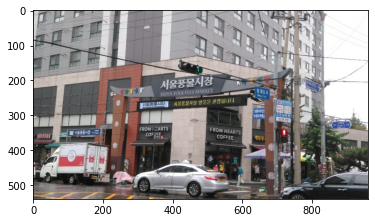

In [ ]:
for batch_x, batch_y in dataset:
    print(batch_x.shape, batch_y.shape)

    target_class = np.argmax(batch_y[0].numpy())
    print(category_dict[target_class])
    plt.figure()
    plt.imshow(batch_x[0].numpy())
    # plt.title('{}'.format(category_dict[target_class]))
    plt.show()

    break

### TFRecords vs Normal benchmark 

동일한 조건에서 순수한 파일 I/O 속도만을 비교하기 위해서 cache, prepetch, multiprocess와 같은 속도에 영향을 줄 수 있는 요소는 제외하고 측정하였습니다.

- TFRecords 사용 시

In [ ]:
get_file(pth.join(data_base_path, 'all_train.tfrecords'))
get_file(pth.join(data_base_path, 'all_val.tfrecords'))
get_file(pth.join(data_base_path, 'test.tfrecords'))

In [ ]:
dataset = tf.data.TFRecordDataset(train_tfrecord_path, compression_type='GZIP')
dataset = dataset.map(_parse_image_function)

In [ ]:
for _ in tqdm(dataset, position=0, leave=True):
    pass

70481it [05:43, 205.02it/s]


- 일반적인 jpg파일 사용 시

In [ ]:
train_ids, val_ids, train_landmark_ids, val_landmark_ids = train_test_split(train_df['id'], train_df['landmark_id'], test_size=0.2, random_state=7777, shuffle=True)

In [ ]:
def load_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.dtypes.cast(img, tf.float32)
    return img, label

In [ ]:
train_tfrecord_array = np.array([pth.join(data_base_path, 'train', img_name+'.JPG') for img_name in train_ids.values])

dataset = tf.data.Dataset.from_tensor_slices((train_tfrecord_array, train_landmark_ids))
dataset = dataset.map(load_image)

In [ ]:
for _ in tqdm(dataset, position=0, leave=True):
    pass

100%|██████████| 70481/70481 [14:40<00:00, 80.08it/s]


- 결과를 보았을 때, 5분 43초(TFRecords) vs 14분 40초(Normal)로 TFRecord를 사용하는 것이 3배 정도 더 빨랐습니다.  
- jpg 이미지가 속도가 더 오래 걸리는 이유는, jpg 방식으로 압축되어 있는 이미지를 raw 이미지로 해독하는데 걸리는 시간으로 인한 오버헤드로 추정됩니다.
- 저 같은 경우 MobileNetV2 기반 모델이고, 코랩 T4 VGA 기준 학습 속도가 한 에폭에 8~9분정도 걸리는 상황이는 파일 I/O 속도가 전체 학습 속도에 미치는 영향은 상당히 큰 것으로 생각됩니다.   
- 또한 실제 사용에서는 Multiprocessing이나 prefetch와 같은 기능도 같이 사용하기 떄문에 이를 사용해서도 테스트 해보겠습니다.

- TFRecords 사용 시

In [ ]:
dataset = tf.data.TFRecordDataset(train_tfrecord_path, compression_type='GZIP')
dataset = dataset.map(_parse_image_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

for _ in tqdm(dataset, position=0, leave=True):
    pass

70481it [05:43, 205.04it/s]


- 일반적인 jpg로 로딩 시

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((train_tfrecord_array, train_landmark_ids))
dataset = dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

for _ in tqdm(dataset, position=0, leave=True):
    pass

100%|██████████| 70481/70481 [05:46<00:00, 203.17it/s]


- 결과를 보았을 때, 놀랍게도 TFRecord를 사용하는 것과 일반 이미지 로딩 방식이 거의 동일한 시간을 보이는 것을 확인할 수 있습니다.  
- 코랩에서는 앞서 언급한 이미지 압축 해제에 대한 오버헤드를 tf.data의 부가기능을 활용하여 충분히 극복할 수 있는 것으로 보입니다.
- 또한, TRRecord는 그냥 읽는 것과 동일한 시간이 걸리는 것으로 확인되는데, 이는 TFRecord로 읽는 방식 자체가 파일 I/O 이외에 별다른 오버헤드가 크게 없어서 그런 것으로 추정됩니다.